In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import BMILorenz

In [2]:
N = 25 #numeber of ensemble members
J = 40 #dimension of Lorenz Model

plotVar = 2 #number of variable to use for metrics and plotting

In [3]:
#make an ensemble of BMILorenz models
ensemble = []
commonStartState = np.zeros(J)
commonStartState[19]=0.01
for n in range (N):
    ensemble.append(BMILorenz.BMILorenz ())
    ensemble[n].initialize()
    startState = commonStartState
    startState[5] = startState [5] + np.random.randn(1)*0.01;
    ensemble[n].set_value('state',startState)
    
#end a truth
truthModel = BMILorenz.BMILorenz ()
truthModel.initialize()
truthModel.set_value('state',commonStartState)
    

In [4]:
#run while keeping output
outputLength = int((truthModel.get_end_time() - truthModel.get_start_time()) / truthModel.get_time_step())

ensembleOutput = np.zeros([outputLength,N])
timeSeries = np.zeros([outputLength])
truth = np.zeros([outputLength])

timeCounter = 0

while truthModel.get_current_time()<truthModel.get_end_time():
    
    truthModel.update()
    truth[timeCounter] = truthModel.get_value_at_indices('state',5)
    
    timeSeries[timeCounter] = truthModel.get_current_time()
    
    
    for n in range (N):
        ensemble[n].update()
        ensembleOutput[timeCounter,n] = ensemble[n].get_value_at_indices('state',5)
        
    timeCounter = timeCounter + 1
    


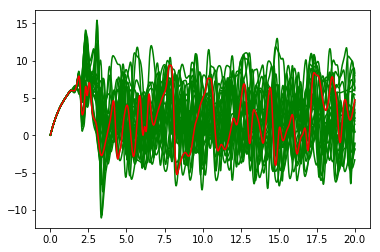

In [6]:
plt.plot(timeSeries,ensembleOutput,'g',timeSeries,truth,'r')